In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/train.csv')

In [50]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [52]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [53]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [54]:
df.duplicated().sum()

0

In [57]:
df = df.dropna()

In [58]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Convert the Order date column into datetime format

In [59]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Order Date']

,Order Date
0,2017-11-08
1,2017-11-08
2,2017-06-12
3,2016-10-11
4,2016-10-11
...,...
9795,2017-05-21
9796,2016-01-12
9797,2016-01-12
9798,2016-01-12


## Retrieve all rows where the Category is 'Furniture':

In [60]:
df[df['Category'] == 'Furniture'].count()

,0
Row ID,2076
Order ID,2076
Order Date,2076
Ship Date,2076
Ship Mode,2076
Customer ID,2076
Customer Name,2076
Segment,2076
Country,2076
City,2076


## Retrieve all rows where the Region is 'West' and Sales are greater than $1000:

In [61]:
west_sales_df = df[(df['Region'] == 'West') & (df['Sales'] > 1000)]
west_sales_df.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
10,11,CA-2015-115812,2015-06-09,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184
24,25,CA-2016-106320,2016-09-25,30/09/2016,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630


## Sort the dataset by Sales in descending order:

In [62]:
sorted_df = df.sort_values(by='Sales',ascending=False)
sorted_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2697,2698,CA-2015-145317,2015-03-18,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
6826,6827,CA-2017-118689,2017-10-02,09/10/2017,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950
8153,8154,CA-2018-140151,2018-03-23,25/03/2018,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960
2623,2624,CA-2018-127180,2018-10-22,24/10/2018,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968
4190,4191,CA-2018-166709,2018-11-17,22/11/2018,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,US-2015-152723,2015-09-26,26/09/2015,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,Texas,75150.0,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876
4711,4712,CA-2015-112403,2015-03-31,31/03/2015,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852
8658,8659,CA-2017-168361,2017-06-21,25/06/2017,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836
9292,9293,CA-2018-124114,2018-03-02,02/03/2018,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,Texas,76706.0,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556


## Find the total sales for each Region:

In [65]:
total_sales_region = df.groupby('Region')['Sales'].sum()
total_sales_region

,Sales
Region,
Central,492646.9132
East,660589.3560
South,389151.4590
West,710219.6845


## Calculate the average Discount for each Category:

In [ ]:
category_discount = df.groupby('Category')['Discount'].mean()
print(category_discount)

## Find the maximum and minimum Profit for each Sub-Category:

In [ ]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].agg(['max', 'min'])
print(subcategory_profit)

## Group the dataset by Region and calculate the sum of Sales for each group:

In [68]:
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region

,Sales
Region,
Central,492646.9132
East,660589.3560
South,389151.4590
West,710219.6845


## Group the data by Category and Sub-Category, and calculate the total Sales and Profit:

In [ ]:
category_subcategory_sales_profit = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum()
print(category_subcategory_sales_profit)


## Find the mean Sales for each combination of Region and Ship Mode:

In [71]:
combination_region_ship_mode = df.groupby(['Region','Ship Mode'])['Sales'].mean()
combination_region_ship_mode

Region   Ship Mode     
Central  First Class       198.826362
         Same Day          170.389169
         Second Class      218.357301
         Standard Class    223.153507
East     First Class       234.971687
         Same Day          281.275740
         Second Class      219.986650
         Standard Class    240.762663
South    First Class       211.404810
         Same Day          253.218952
         Second Class      287.490882
         Standard Class    235.546799
West     First Class       252.529291
         Same Day          222.838689
         Second Class      236.068426
         Standard Class    215.992495
Name: Sales, dtype: float64

## Create a new column that calculates the Profit Margin as a percentage of Sales:

In [74]:
df['Profit Margin'] = (df['Profit']/df['Sales']*100)
print(df.head(2))

## Create a new column categorizing Sales into 'Low', 'Medium', and 'High':

In [77]:
bins = [0,100,500,df['Sales'].max()]
labels = ['Low','Medium','High']
df['Sales_Category'] = pd.cut(df['Sales'],bins=bins,labels=labels)
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales_Category
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Medium
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,High


## Create a pivot table that shows total Sales by Region and Category:

In [78]:
pivot_table_sales = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
print(pivot_table_sales)


Category    Furniture  Office Supplies  Technology
Region                                            
Central   160317.4622       163590.243  168739.208
East      201341.2880       197731.301  261516.767
South     116531.4800       124424.771  148195.208
West      245348.2455       217466.509  247404.930


## Create a pivot table to display the average Profit by Ship Mode and Segment:

In [79]:
pivot_table_profit = df.pivot_table(values='Profit',index='Ship Mode',columns='Segment',aggfunc='sum')
print(pivot_table_profit)

## Time Series Analysis
#### Resample the data to get monthly Sales totals:

In [81]:
monthly_sales = df.resample('M',on='Order Date')['Sales'].sum()
monthly_sales

,Sales
Order Date,
2015-01-31,14205.7070
2015-02-28,4519.8920
2015-03-31,55205.7970
2015-04-30,27906.8550
2015-05-31,23644.3030
2015-06-30,34322.9356
2015-07-31,33781.5430
2015-08-31,27117.5365
2015-09-30,81623.5268


##### Find the month with the highest total Sales:

In [84]:
max_sales_month = monthly_sales.idxmax()
max_sales_month

Timestamp('2018-11-30 00:00:00')

#### Calculate the rolling average of Sales over a 3-month window:

In [86]:
rolling_sales = monthly_sales.rolling(window=3).mean()
rolling_sales

,Sales
Order Date,
2015-01-31,NaN
2015-02-28,NaN
2015-03-31,24643.798667
2015-04-30,29210.848000
2015-05-31,35585.651667
2015-06-30,28624.697867
2015-07-31,30582.927200
2015-08-31,31740.671700
2015-09-30,47507.535433


#### Set the Order Date column as the index and slice the data to retrieve all orders from 2017:

In [89]:
df.set_index('Order Date', inplace=True)
df_2017 = df['2017']
print(df_2017.head())

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales_Category
Order Date,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Medium
2017-11-08,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,High


# Data Visualisation

####  Plot the distribution of Sales using a histogram.

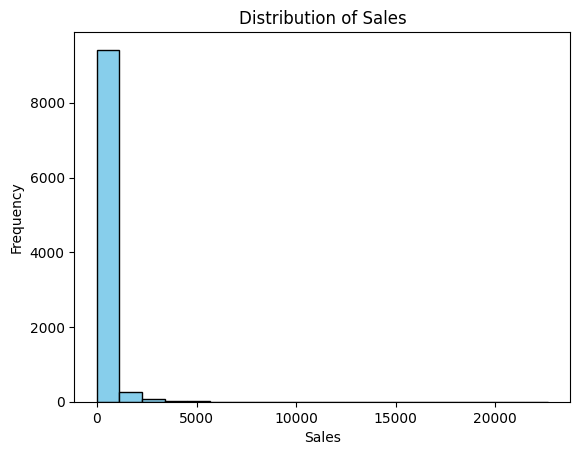

In [95]:
import matplotlib.pyplot as plt

df['Sales'].plot(kind='hist', bins=20, title='Distribution of Sales', color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


#### Create a bar chart showing total Sales for each Region.


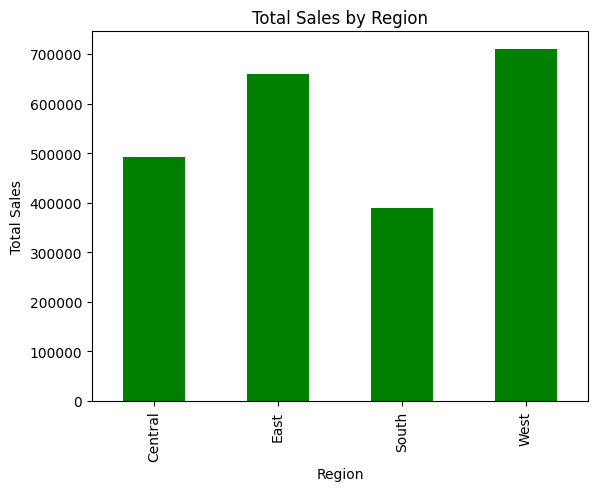

In [97]:

region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', title='Total Sales by Region', color='green')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


#### Plot a time series of Sales over time.

In [98]:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_sales.plot(title='Monthly Sales Over Time', color='purple')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


#### Create a pie chart to show the percentage of total Sales by Category

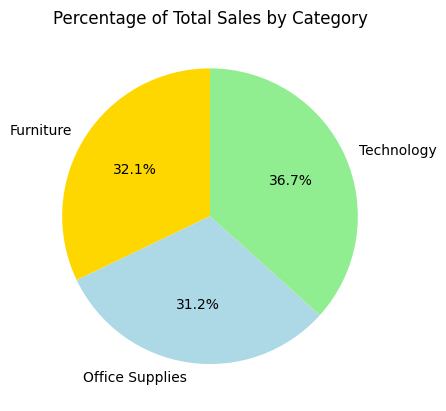

In [102]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Percentage of Total Sales by Category')
plt.ylabel('')  # Remove y-label for clarity
plt.show()
